---
# Contents
<ol>
    <li>Import packages</li>
    <li>Explore tables</li>
    <li>Analysis by country</li>
    <li>Analysis by country</li>
    <li>Analyse win and lose by teams</li>
</ol>

# 1. Import packages

In [60]:
from sqlite3 import connect
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Explore tables
* https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html

In [3]:
# Create a connection object
#  connection = connect('/kaggle/input/soccer/database.sqlite')
connection = connect('Data/database.sqlite')

all_tables = pd.read_sql("""    
                            SELECT 
                                * 
                            FROM 
                                sqlite_master
                            WHERE 
                                type='table';
                        """, connection)

## 2.1. Examine tables in database

In [7]:
all_tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


## 2.2. Display all countries in a dataframe

In [8]:
# Display all countries in a dataframe
countries = pd.read_sql(""" 
                            SELECT   
                                * 
                            FROM 
                                Country;
                        """, connection)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


## 2.3. Display all Leagues

In [9]:
# Display all Leagues
Leagues = pd.read_sql("""
                        SELECT 
                            * 
                        FROM 
                            League;
                    """, connection)
Leagues

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


## 2.4. Display all teams

In [10]:
# Display all teams
teams = pd.read_sql("""
                        SELECT 
                            * 
                        FROM 
                            Team;
                    """, connection)
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


## 2.5. Display all matches

In [11]:
# Display all matches
matches = pd.read_sql("""
                        SELECT 
                            * 
                        FROM 
                            Match;
                    """, connection)
matches

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### The 'Match' table has 115 columns. We will selects those we are interested in.

#### It appear country_id and league_is is identical, let's check.

In [12]:
country_not_league = pd.read_sql("""
                        SELECT 
                            count(country_id) as count
                        FROM 
                            Match
                        where country_id != league_id;
                    """, connection)
country_not_league

,count
0,0


* So the two columns are identical. We can skip one.

#### Explore all column titles

In [13]:
# explore all column titles
matches_columns = matches.columns
print(list(matches_columns))

['id', 'country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10', 'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9', 'away_player_X10', 'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 'home_player_Y10', 'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8', 'away_player_Y9', 'away_player_Y10', 'away_player_Y11', 'home_player_1', 'home_player_2', 'home_player_

#### Select column titles of interest. Data is extracted form pandas dataframe 'matches'.

In [14]:
# select columns of interest: columns' titles
selected_matches_columns = ['id', 'country_id', 'season', 'stage', 'date', 'match_api_id', 
                            'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal']

In [15]:
# columns of interest: of those 115 columns, we select only some
# data are retrived from dataframe
shorten_matches = matches[selected_matches_columns]
shorten_matches

,id,country_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0
25975,25976,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2
25976,25977,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0
25977,25978,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0


#### Select column titles of interest. Data is extracted form sql table 'Match'

In [16]:
# We can perform the same task using sql query
# Display all matches. 
matches = pd.read_sql("""
                        SELECT 
                            id, country_id, season, stage, date, match_api_id, 
                            home_team_api_id, away_team_api_id, home_team_goal, away_team_goal
                        FROM 
                            Match;
                    """, connection)
matches

,id,country_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0
25975,25976,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2
25976,25977,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0
25977,25978,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0


## 2.6.  Display all players

In [17]:
# Display all players
players = pd.read_sql("""
                        SELECT 
                            * 
                        FROM 
                            Player;
                    """, connection)
players

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


---
# 3. Analysis by country


## 3.1. The league of each country in database

In [18]:
league_by_country = pd.read_sql_query("""
                                        SELECT 
                                            Country.name country,
                                            League.name league                                            
                                        FROM League
                                            join Country
                                        WHERE League.id = Country.id;
                                    """, connection)
league_by_country

,country,league
0,Belgium,Belgium Jupiler League
1,England,England Premier League
2,France,France Ligue 1
3,Germany,Germany 1. Bundesliga
4,Italy,Italy Serie A
5,Netherlands,Netherlands Eredivisie
6,Poland,Poland Ekstraklasa
7,Portugal,Portugal Liga ZON Sagres
8,Scotland,Scotland Premier League
9,Spain,Spain LIGA BBVA


## 3.2. Sorting matches by countries

#### <strong>Aim</strong>: We have seen before that there are 115 columns in 'Match' table. We will generate a table that display information on all matches with following information: 
    * country, league, season, stage, date, home_team, away_team, home_team_goal, away_team_goal
#### <strong>Methods</strong>: We will combine SQL quyeries and pandas,
#### Note that home_team_name and away_team name are not in 'Match' table. We only have their api_id. We will need to extract names correcponding to this id from 'Team' table. 

In [22]:
# select columns of interest: columns' titles
selected_matches_columns = ['id', 'country_id', 'season', 'stage', 'date', 'match_api_id', 
                            'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal']

In [23]:
# Display all matches. 
matches = pd.read_sql("""
                        SELECT 
                            id, country_id, season, stage, date, match_api_id, 
                            home_team_api_id, away_team_api_id, home_team_goal, away_team_goal
                        FROM 
                            Match;
                    """, connection)

In [24]:
# Select columns of interest from dataframe.
matches[['id', 'country_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal']]

,id,country_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0
25975,25976,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2
25976,25977,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0
25977,25978,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0


teams.columns

#### Our next task is to replace 'home_team_api_id' and 'away_team_api_id' with their corresponding 'team_long_name' from 'Team' table.

In [25]:
teams.columns

Index(['id', 'team_api_id', 'team_fifa_api_id', 'team_long_name',
       'team_short_name'],
      dtype='object')

In [26]:
matches_by_countries = pd.read_sql("""
                                    SELECT                                          --Choose columns--
                                        Country.name as country,
                                        League.name as leagea, 
                                        Match.season, 
                                        Match.stage, 
                                        Match.date,
                                        Team.team_long_name as 'home_team_name',         --Replace home_team_api_id by team_long_name-- 
                                        Match.away_team_api_id, 
                                        Match.home_team_goal, 
                                        Match.away_team_goal
                                    FROM 
                                        Country join League join Match join Team
                                    WHERE 
                                        Country.id = League.country_id and
                                        Country.id = Match.country_id and 
                                        Team.team_api_id = Match.home_team_api_id
                                        ;""", connection)
matches_by_countries                 

,country,leagea,season,stage,date,home_team_name,away_team_api_id,home_team_goal,away_team_goal
0,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,KRC Genk,9993,1,1
1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,SV Zulte-Waregem,9994,0,0
2,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,KSV Cercle Brugge,8635,0,3
3,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,KAA Gent,9998,5,0
4,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,FCV Dender EH,9985,1,3
...,...,...,...,...,...,...,...,...,...
25974,Switzerland,Switzerland Super League,2015/2016,9,2015-09-22 00:00:00,FC St. Gallen,10191,1,0
25975,Switzerland,Switzerland Super League,2015/2016,9,2015-09-23 00:00:00,FC Vaduz,10199,1,2
25976,Switzerland,Switzerland Super League,2015/2016,9,2015-09-23 00:00:00,Grasshopper Club Zürich,10179,2,0
25977,Switzerland,Switzerland Super League,2015/2016,9,2015-09-22 00:00:00,Lugano,10243,0,0


#### We now need to replace away_team_api_id with corresponding team name. To do this, we create a new table of two columns 'team_long_name' from 'Team' table and 'away_team_api_id' from 'Match' table. We then use this table to match name of 'away_team_api_id' from the table we just created above.

In [27]:
# generate away_team_name from Team table that matches away_team_api_id from Match table
away_team_name_and_id = pd.read_sql("""
                                        SELECT 
                                            Team.team_long_name as 'away_team_name',
                                            Match.away_team_api_id
                                        FROM 
                                            Match join Team
                                        WHERE 
                                            Team.team_api_id = Match.away_team_api_id;
                                    """, connection)
away_team_name_and_id

,away_team_name,away_team_api_id
0,Beerschot AC,9993
1,Sporting Lokeren,9994
2,RSC Anderlecht,8635
3,RAEC Mons,9998
4,Standard de Liège,9985
...,...,...
25974,FC Thun,10191
25975,FC Luzern,10199
25976,FC Sion,10179
25977,FC Zürich,10243


We now merge two dataframes.

In [28]:
matches_by_countries_raw = pd.merge(matches_by_countries, away_team_name_and_id, how = 'left', on = 'away_team_api_id').drop_duplicates()
matches_by_countries_raw


,country,leagea,season,stage,date,home_team_name,away_team_api_id,home_team_goal,away_team_goal,away_team_name
0,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,KRC Genk,9993,1,1,Beerschot AC
76,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,SV Zulte-Waregem,9994,0,0,Sporting Lokeren
182,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,KSV Cercle Brugge,8635,0,3,RSC Anderlecht
288,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,KAA Gent,9998,5,0,RAEC Mons
335,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,FCV Dender EH,9985,1,3,Standard de Liège
...,...,...,...,...,...,...,...,...,...,...
2949776,Switzerland,Switzerland Super League,2015/2016,9,2015-09-22 00:00:00,FC St. Gallen,10191,1,0,FC Thun
2949883,Switzerland,Switzerland Super League,2015/2016,9,2015-09-23 00:00:00,FC Vaduz,10199,1,2,FC Luzern
2950026,Switzerland,Switzerland Super League,2015/2016,9,2015-09-23 00:00:00,Grasshopper Club Zürich,10179,2,0,FC Sion
2950169,Switzerland,Switzerland Super League,2015/2016,9,2015-09-22 00:00:00,Lugano,10243,0,0,FC Zürich


In [29]:
# check columns before arrange
matches_by_countries_raw.columns

Index(['country', 'leagea', 'season', 'stage', 'date', 'home_team_name',
       'away_team_api_id', 'home_team_goal', 'away_team_goal',
       'away_team_name'],
      dtype='object')

In [30]:
# choose columns in order
new_columns = ['country', 'leagea', 'season', 'stage', 'date', 'home_team_name', 'away_team_name', 'home_team_goal', 'away_team_goal']
# display all matches in order of columns of interest
matches_by_countries_final = matches_by_countries_raw[new_columns]
matches_by_countries_final

,country,leagea,season,stage,date,home_team_name,away_team_name,home_team_goal,away_team_goal
0,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,KRC Genk,Beerschot AC,1,1
76,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,SV Zulte-Waregem,Sporting Lokeren,0,0
182,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,KSV Cercle Brugge,RSC Anderlecht,0,3
288,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,KAA Gent,RAEC Mons,5,0
335,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,FCV Dender EH,Standard de Liège,1,3
...,...,...,...,...,...,...,...,...,...
2949776,Switzerland,Switzerland Super League,2015/2016,9,2015-09-22 00:00:00,FC St. Gallen,FC Thun,1,0
2949883,Switzerland,Switzerland Super League,2015/2016,9,2015-09-23 00:00:00,FC Vaduz,FC Luzern,1,2
2950026,Switzerland,Switzerland Super League,2015/2016,9,2015-09-23 00:00:00,Grasshopper Club Zürich,FC Sion,2,0
2950169,Switzerland,Switzerland Super League,2015/2016,9,2015-09-22 00:00:00,Lugano,FC Zürich,0,0


### We now add one more column showing if home_team won/lost each game

In [31]:
def this_map(x):
    if x < 0:
        return -1
    if x > 0:
        return 1
    return 0
matches_by_countries_final['result'] = matches_by_countries_final['home_team_goal'] - matches_by_countries_final['away_team_goal']
matches_by_countries_final['result'] = matches_by_countries_final['result'].apply(lambda x:this_map(x))
matches_by_countries_final


,country,leagea,season,stage,date,home_team_name,away_team_name,home_team_goal,away_team_goal,result
0,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,KRC Genk,Beerschot AC,1,1,0
76,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,SV Zulte-Waregem,Sporting Lokeren,0,0,0
182,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,KSV Cercle Brugge,RSC Anderlecht,0,3,-1
288,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,KAA Gent,RAEC Mons,5,0,1
335,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,FCV Dender EH,Standard de Liège,1,3,-1
...,...,...,...,...,...,...,...,...,...,...
2949776,Switzerland,Switzerland Super League,2015/2016,9,2015-09-22 00:00:00,FC St. Gallen,FC Thun,1,0,1
2949883,Switzerland,Switzerland Super League,2015/2016,9,2015-09-23 00:00:00,FC Vaduz,FC Luzern,1,2,-1
2950026,Switzerland,Switzerland Super League,2015/2016,9,2015-09-23 00:00:00,Grasshopper Club Zürich,FC Sion,2,0,1
2950169,Switzerland,Switzerland Super League,2015/2016,9,2015-09-22 00:00:00,Lugano,FC Zürich,0,0,0


## 3.3. Counting matches by countries and sorting by increasing order

In [34]:
count_matches_by_countries = pd.read_sql("""
                                            SELECT                                         
                                                Country.name country,
                                                Count() as 'number of matches'
                                            FROM 
                                                Country join Match
                                            WHERE 
                                                Country.id= Match.country_id
                                            GROUP BY Country.name
                                            ORDER BY 'number of matches';
                                        """, connection)
count_matches_by_countries   

,country,number of matches
0,Belgium,1728
1,England,3040
2,France,3040
3,Germany,2448
4,Italy,3017
5,Netherlands,2448
6,Poland,1920
7,Portugal,2052
8,Scotland,1824
9,Spain,3040


---
# 4. Analyse teams
* In this section, we analyse relationship between number of games each team player, how many goals each team scored and lost in total, what ratio between number of goal a team could scored v.s. lost each game.

## 4.1. Count matches by teams

In [35]:
# Insert column of how many games each team played during the season
matches_by_teams = matches_by_countries_final.groupby(['home_team_name'])['home_team_name'].count().reset_index(name="games_played")
matches_by_teams

,home_team_name,games_played
0,1. FC Kaiserslautern,34
1,1. FC Köln,102
2,1. FC Nürnberg,85
3,1. FSV Mainz 05,119
4,AC Ajaccio,57
...,...,...
291,Xerez Club Deportivo,19
292,Zagłębie Lubin,90
293,Zawisza Bydgoszcz,30
294,Évian Thonon Gaillard FC,76


## 4.2. Count goals scored by teams

In [36]:
# Insert column of total goals a team scored during season
goals_scored_by_teams = matches_by_countries_final.groupby(['home_team_name'])['home_team_goal'].sum().reset_index(name="goals_scored")
goals_scored_by_teams

,home_team_name,goals_scored
0,1. FC Kaiserslautern,37
1,1. FC Köln,116
2,1. FC Nürnberg,108
3,1. FSV Mainz 05,171
4,AC Ajaccio,64
...,...,...
291,Xerez Club Deportivo,20
292,Zagłębie Lubin,116
293,Zawisza Bydgoszcz,43
294,Évian Thonon Gaillard FC,105


## 4.3. Count goals lost by team

In [45]:
# Insert column of total goals a team lost during the season
goals_lost_by_teams = matches_by_countries_final.groupby(['home_team_name'])['away_team_goal'].sum().reset_index(name="goals_lost")
goals_lost_by_teams

,home_team_name,goals_lost
0,1. FC Kaiserslautern,47
1,1. FC Köln,139
2,1. FC Nürnberg,118
3,1. FSV Mainz 05,129
4,AC Ajaccio,77
...,...,...
291,Xerez Club Deportivo,29
292,Zagłębie Lubin,108
293,Zawisza Bydgoszcz,38
294,Évian Thonon Gaillard FC,103


## 4.4. Merge dataframes
* We will display number of games played by team and how many goals they scored and lost during the season.

In [46]:
# merge dataframe by home_team_name
goals_by_teams = pd.merge(pd.merge(matches_by_teams,goals_scored_by_teams,on='home_team_name'),goals_lost_by_teams,on='home_team_name')
goals_by_teams

,home_team_name,games_played,goals_scored,goals_lost
0,1. FC Kaiserslautern,34,37,47
1,1. FC Köln,102,116,139
2,1. FC Nürnberg,85,108,118
3,1. FSV Mainz 05,119,171,129
4,AC Ajaccio,57,64,77
...,...,...,...,...
291,Xerez Club Deportivo,19,20,29
292,Zagłębie Lubin,90,116,108
293,Zawisza Bydgoszcz,30,43,38
294,Évian Thonon Gaillard FC,76,105,103


## 4.5. Count goals scored and lost per game by teams

In [48]:
# add column of goals scored per game during the season
goals_by_teams['goals_scored_per_game'] = goals_by_teams['goals_scored']/goals_by_teams['games_played']
goals_by_teams

,home_team_name,games_played,goals_scored,goals_lost,goals_lost_per_game,goals_scored_per_game
0,1. FC Kaiserslautern,34,37,47,1.382353,1.088235
1,1. FC Köln,102,116,139,1.362745,1.137255
2,1. FC Nürnberg,85,108,118,1.388235,1.270588
3,1. FSV Mainz 05,119,171,129,1.084034,1.436975
4,AC Ajaccio,57,64,77,1.350877,1.122807
...,...,...,...,...,...,...
291,Xerez Club Deportivo,19,20,29,1.526316,1.052632
292,Zagłębie Lubin,90,116,108,1.200000,1.288889
293,Zawisza Bydgoszcz,30,43,38,1.266667,1.433333
294,Évian Thonon Gaillard FC,76,105,103,1.355263,1.381579


In [49]:
# add column of goals lost per game during the season
goals_by_teams['goals_lost_per_game'] = goals_by_teams['goals_lost']/goals_by_teams['games_played']
goals_by_teams

,home_team_name,games_played,goals_scored,goals_lost,goals_lost_per_game,goals_scored_per_game
0,1. FC Kaiserslautern,34,37,47,1.382353,1.088235
1,1. FC Köln,102,116,139,1.362745,1.137255
2,1. FC Nürnberg,85,108,118,1.388235,1.270588
3,1. FSV Mainz 05,119,171,129,1.084034,1.436975
4,AC Ajaccio,57,64,77,1.350877,1.122807
...,...,...,...,...,...,...
291,Xerez Club Deportivo,19,20,29,1.526316,1.052632
292,Zagłębie Lubin,90,116,108,1.200000,1.288889
293,Zawisza Bydgoszcz,30,43,38,1.266667,1.433333
294,Évian Thonon Gaillard FC,76,105,103,1.355263,1.381579


## 4.6. Ratio of goals scored v.s lost per game by teams

In [52]:
# add column of ratio of goals scored/goals lost during the season 
goals_by_teams['goal_scored/goal_lost ratio'] = goals_by_teams['goals_scored']/goals_by_teams['goals_lost']
goals_by_teams

,home_team_name,games_played,goals_scored,goals_lost,goals_lost_per_game,goals_scored_per_game,goal_scored/goal_lost ratio
0,1. FC Kaiserslautern,34,37,47,1.382353,1.088235,0.787234
1,1. FC Köln,102,116,139,1.362745,1.137255,0.834532
2,1. FC Nürnberg,85,108,118,1.388235,1.270588,0.915254
3,1. FSV Mainz 05,119,171,129,1.084034,1.436975,1.325581
4,AC Ajaccio,57,64,77,1.350877,1.122807,0.831169
...,...,...,...,...,...,...,...
291,Xerez Club Deportivo,19,20,29,1.526316,1.052632,0.689655
292,Zagłębie Lubin,90,116,108,1.200000,1.288889,1.074074
293,Zawisza Bydgoszcz,30,43,38,1.266667,1.433333,1.131579
294,Évian Thonon Gaillard FC,76,105,103,1.355263,1.381579,1.019417


## 4.7. Visualise distribution of goals 

#### Distribution of goals_scored_per_game

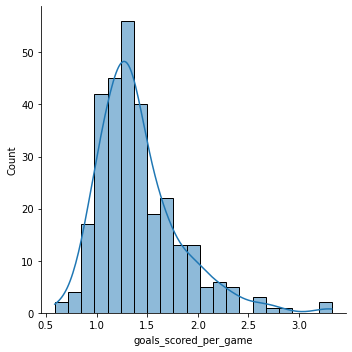

In [63]:
sns.displot(data=goals_by_teams,x='goals_scored_per_game', kde=True)

#### Distribution of goals_lost_per_game

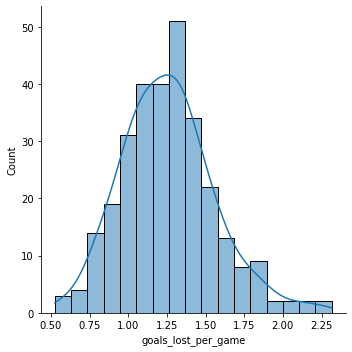

In [64]:
sns.displot(data=goals_by_teams,x='goals_lost_per_game', kde=True)

#### Distribution of goals_scored/goal_lost_ ratio

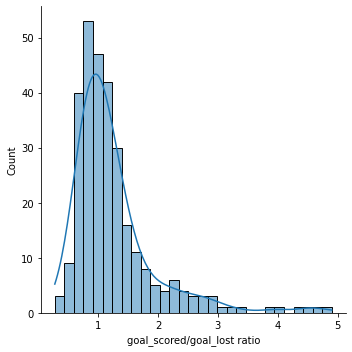

In [65]:
sns.displot(data=goals_by_teams,x='goal_scored/goal_lost ratio', kde=True)

# 5. Analyse win and lose by teams

## 5.1. Count number of games a team won during the season


In [66]:
# Count number of games a team won during the season
filter_won_results = matches_by_countries_final[matches_by_countries_final['result']== 1]
won_games_by_teams = filter_won_results.groupby('home_team_name')['result'].count().reset_index(name = "matches_won")
won_games_by_teams

,home_team_name,matches_won
0,1. FC Kaiserslautern,8
1,1. FC Köln,32
2,1. FC Nürnberg,30
3,1. FSV Mainz 05,55
4,AC Ajaccio,16
...,...,...
290,Xerez Club Deportivo,6
291,Zagłębie Lubin,35
292,Zawisza Bydgoszcz,13
293,Évian Thonon Gaillard FC,29


## 5.2. Count number of games a team lost during the season

In [67]:
# Count number of games a team lost during the season
filter_lost_results = matches_by_countries_final[matches_by_countries_final['result']== -1]
lost_games_by_teams = filter_lost_results.groupby('home_team_name')['result'].count().reset_index(name = "matches_lost")
lost_games_by_teams

,home_team_name,matches_lost
0,1. FC Kaiserslautern,15
1,1. FC Köln,39
2,1. FC Nürnberg,34
3,1. FSV Mainz 05,35
4,AC Ajaccio,22
...,...,...
291,Xerez Club Deportivo,9
292,Zagłębie Lubin,28
293,Zawisza Bydgoszcz,12
294,Évian Thonon Gaillard FC,30


## 5.3.Count number of games a team tie during the season

In [68]:
filter_tie_results = matches_by_countries_final[matches_by_countries_final['result']== 0]
tie_games_by_teams = filter_tie_results.groupby('home_team_name')['result'].count().reset_index(name = "matches_tie")
tie_games_by_teams

,home_team_name,matches_tie
0,1. FC Kaiserslautern,11
1,1. FC Köln,31
2,1. FC Nürnberg,21
3,1. FSV Mainz 05,29
4,AC Ajaccio,19
...,...,...
290,Xerez Club Deportivo,4
291,Zagłębie Lubin,27
292,Zawisza Bydgoszcz,5
293,Évian Thonon Gaillard FC,17


## 5.4. Merge dataframes

In [69]:
result_by_teams = pd.merge(pd.merge(pd.merge(matches_by_teams,won_games_by_teams,on='home_team_name'),
                                        lost_games_by_teams,on='home_team_name'), 
                                        tie_games_by_teams, on='home_team_name')
result_by_teams

,home_team_name,games_played,matches_won,matches_lost,matches_tie
0,1. FC Kaiserslautern,34,8,15,11
1,1. FC Köln,102,32,39,31
2,1. FC Nürnberg,85,30,34,21
3,1. FSV Mainz 05,119,55,35,29
4,AC Ajaccio,57,16,22,19
...,...,...,...,...,...
289,Xerez Club Deportivo,19,6,9,4
290,Zagłębie Lubin,90,35,28,27
291,Zawisza Bydgoszcz,30,13,12,5
292,Évian Thonon Gaillard FC,76,29,30,17


#### Let's add three columns: won/game, lost/game, and tie/game

In [73]:
result_by_teams['won/game ratio'] = result_by_teams['matches_won']/result_by_teams['games_played']
result_by_teams['lost/game ratio'] = result_by_teams['matches_lost']/result_by_teams['games_played']
result_by_teams['tie/game ratio'] = result_by_teams['matches_tie']/result_by_teams['games_played']
result_by_teams


,home_team_name,games_played,matches_won,matches_lost,matches_tie,won/game ratio,lost/game ratio,tie/game ratio
0,1. FC Kaiserslautern,34,8,15,11,0.235294,0.441176,0.323529
1,1. FC Köln,102,32,39,31,0.313725,0.382353,0.303922
2,1. FC Nürnberg,85,30,34,21,0.352941,0.400000,0.247059
3,1. FSV Mainz 05,119,55,35,29,0.462185,0.294118,0.243697
4,AC Ajaccio,57,16,22,19,0.280702,0.385965,0.333333
...,...,...,...,...,...,...,...,...
289,Xerez Club Deportivo,19,6,9,4,0.315789,0.473684,0.210526
290,Zagłębie Lubin,90,35,28,27,0.388889,0.311111,0.300000
291,Zawisza Bydgoszcz,30,13,12,5,0.433333,0.400000,0.166667
292,Évian Thonon Gaillard FC,76,29,30,17,0.381579,0.394737,0.223684


## 5.6. Visualise distribution of ratios

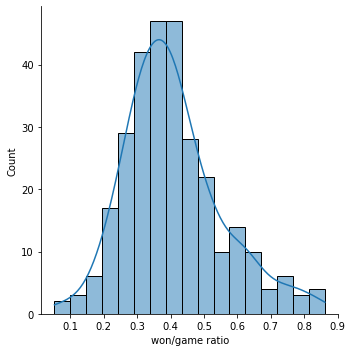

In [74]:
sns.displot(data=result_by_teams,x='won/game ratio', kde=True)

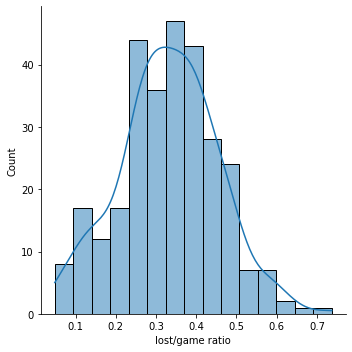

In [75]:
sns.displot(data=result_by_teams,x='lost/game ratio', kde=True)

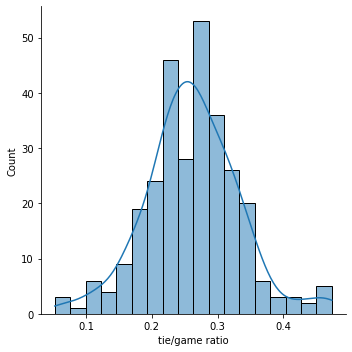

In [76]:
sns.displot(data=result_by_teams,x='tie/game ratio', kde=True)